In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [4]:
tf.__version__

'2.1.0'

In [5]:
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

X_train.shape

(28565, 100, 6)

In [40]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(1000).batch(128)

In [41]:
train_ds

<BatchDataset shapes: ((None, 100, 6), (None,)), types: (tf.float64, tf.int64)>

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, input_shape=(100, 6)),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=18, activation='softmax')
])

In [73]:
# optimizer = optim.Adam(lr=1e-6)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(train_ds.take(5), epochs=200, verbose=2)

Train for 5 steps
Epoch 1/200
5/5 - 0s - loss: 1.5093 - accuracy: 0.4609
Epoch 2/200
5/5 - 0s - loss: 1.6276 - accuracy: 0.4828
Epoch 3/200
5/5 - 0s - loss: 1.3117 - accuracy: 0.5375
Epoch 4/200
5/5 - 0s - loss: 1.4702 - accuracy: 0.4609
Epoch 5/200
5/5 - 0s - loss: 1.2014 - accuracy: 0.6016
Epoch 6/200
5/5 - 0s - loss: 2.0433 - accuracy: 0.2922
Epoch 7/200
5/5 - 0s - loss: 1.3575 - accuracy: 0.5031
Epoch 8/200
5/5 - 0s - loss: 1.4659 - accuracy: 0.4781
Epoch 9/200
5/5 - 0s - loss: 1.3409 - accuracy: 0.5484
Epoch 10/200
5/5 - 0s - loss: 1.3398 - accuracy: 0.5031
Epoch 11/200
5/5 - 0s - loss: 1.3502 - accuracy: 0.5156
Epoch 12/200
5/5 - 0s - loss: 1.2592 - accuracy: 0.5437
Epoch 13/200
5/5 - 0s - loss: 1.5516 - accuracy: 0.4719
Epoch 14/200
5/5 - 0s - loss: 1.3127 - accuracy: 0.5500
Epoch 15/200
5/5 - 0s - loss: 1.5660 - accuracy: 0.4734
Epoch 16/200
5/5 - 0s - loss: 1.4345 - accuracy: 0.5547
Epoch 17/200
5/5 - 0s - loss: 1.7905 - accuracy: 0.3641
Epoch 18/200
5/5 - 0s - loss: 1.3145 - 

In [81]:
loss = history.history['accuracy']

In [76]:
from matplotlib import pyplot as plt

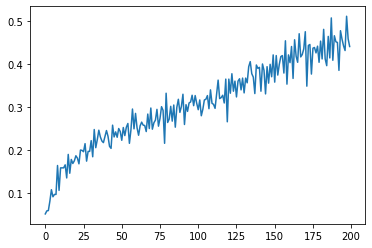

In [77]:
plt.plot(loss)

In [79]:
preds = model.evaluate(X_test, y_test, batch_size=32)

3173/3173 [==============================] - 2s 508us/sample - loss: 2.4227 - accuracy: 0.3114
